# Machine Learning with **scikit-learn**

`pip install sklearn`

In this lecture we will not go into any machine learning details or talk about the theoretical background, but we will give you a quick overview of machine learning. And afterwards we will learn how we can do machine learning with python.

In [ ]:
pip install sklearn

<center><img src="images/machine_learning_overview.jpg"/></center>

## the structure of **scikit-learn**
At the center of Scikit-Learn are its models.<br>
**step 1:** import a model class from `sklearn`

A model can be instantiated with different hyperparemters, effecting how it learns from the data.<br>
**step 2:** intialize model with hyperparameters

If we want to do *supervised learning* then our model learns to predict `targets` from `features`, and so...<br>
**step 3:** split data into `feature` matrix and `target` vector

Now we are ready to train/learn/fit our model<br>
**step 4:** fit the model to our data by calling the `fit()` method of the model.

**step 5:** Apply the model to new data
   - For supervised learning, often we predict labels for unknown data using the `predict()` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform()`or `predict()` method.




---
## Supvervised Learning
---
### Optional Recap: Regression
we start with a *supervised learning machine learning algorithm*: **Linear Regression**

**step 1:** import a model class from `sklearn`<br>
we import the LinearRegression class which allows us to instantiate linea models

In [1]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

**step 2:** intialize model with hyperparameters<br>
we set `fit_intercept`to `True` which tells to model to also learn a parameter for the `intercept`

In [2]:
model = LinearRegression(fit_intercept=True)

**step 3:** split data into `feature` matrix and `target` vector<br>
for this step we will create some toy data


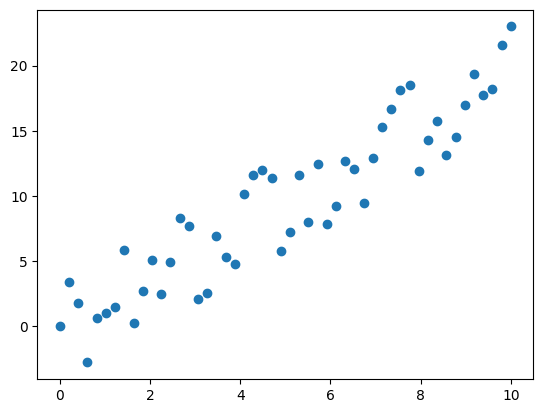

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

feature_x = np.linspace(start=0, stop=10, num=50)
target_y = 2 * feature_x + np.random.randint(low=-4, high=4, size=len(feature_x))

# model.fit will expect a 2d array for x, so we add a dummy dimension 
# so e.g. [1,2,3] becomes [[1], [2], [3]]
feature_x = np.expand_dims(feature_x, axis=1)

plt.scatter(feature_x, target_y);

**step 4:** fit the model to our data by callng the `fit()` method of the model.<br>
the parameters that our model learns are the `intercept` and `slope`(coefficient) of a linear function.

In [2]:
model.fit(feature_x, target_y)
model.coef_, model.intercept_

NameError: name 'model' is not defined

**step 5:** Apply the model to new data.


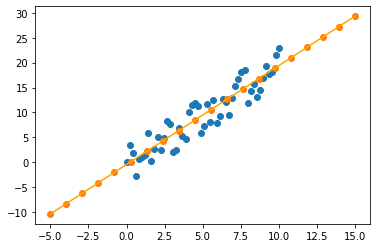

In [5]:
feature_x_new = np.linspace(start=-5, stop=15, num=20)
y_predicted = model.predict(np.expand_dims(feature_x_new, axis=-1))

plt.scatter(feature_x, target_y)
plt.scatter(feature_x_new, y_predicted);
plt.plot(feature_x_new, y_predicted, color="orange")

---
## Classificiation
---
### Decision Trees

**step 1:** import a model class from `sklearn`<br>

In [3]:
from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'sklearn'

**step 2:** intialize model with hyperparameters<br>


In [7]:
model = DecisionTreeClassifier()

**step 3:** split data into `feature` matrix and `target` vector<br>
for this step we will use flower data from sklearn


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

**step 4:** fit the model to our data by callng the `fit()` method of the model.

In [11]:
model.fit(X, y);

**step 5:** Apply the model to "new" data.

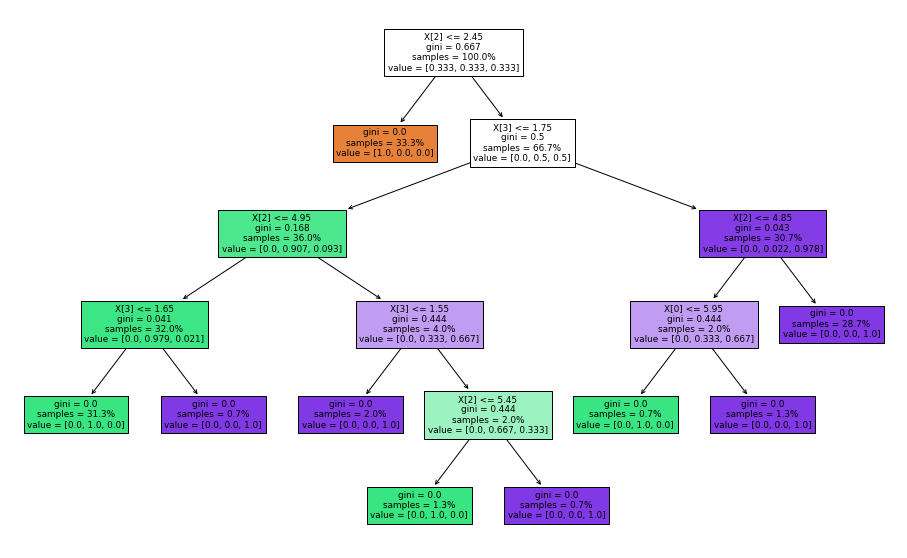

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(model, filled=True, proportion=True);

In [13]:
model.predict([X[20]])

array([0])

In [14]:
y[20]

0

---
## K-nearest Neighbors

---
# Unsupervised learning
---
## Clustering 

__What is clustering ?__

Clustering is one of the most popular unsupervised classification techniques. An unsupervised learning method is a method in which we draw references from datasets consisting of input data without labeled responses. Generally, it is used as a process to find meaningful structure, explanatory underlying processes, generative features, and groupings inherent in a set of examples. 

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them. 

 - Example: As you can see in the image below, the data point are being clustered into different groups 

In [4]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1400/1*JoSI7oFZXqKG8HNti0asvg.gif')

__Why Clustering?__

Clustering is very much important as it determines the intrinsic grouping among the unlabelled data present. There are no criteria for good clustering. It depends on the user, what is the criteria they may use which satisfy their need. For instance, we could be interested in finding representatives for homogeneous groups (data reduction), in finding “natural clusters” and describe their unknown properties (“natural” data types), in finding useful and suitable groupings (“useful” data classes) or in finding unusual data objects (outlier detection). This algorithm must make some assumptions that constitute the similarity of points and each assumption make different and equally valid clusters. 

__What are the Uses of Clustering?__

Clustering has a myriad of uses in a variety of industries. Some common applications for clustering include the following:

- market segmentation
- social network analysis
- search result grouping
- medical imaging
- fraud detection
- image segmentation
- anomaly detection

### Types of Clustering

Broadly speaking, clustering can be divided into two subgroups :

- __Hard Clustering:__ In hard clustering, each data point either belongs to a cluster completely or not. For example, in the above example each customer is put into one group out of the 10 groups.

- __Soft Clustering:__ In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, from the above scenario each costumer is assigned a probability to be in either of 10 clusters of the retail store

There are different types of clustering techniques. Here is this notebook, we give you a little inside about K-means clustering in this notebook. 

---
## Introduction to K-Means

The **k-means** algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.
Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [6]:
from sklearn.datasets import make_blobs

# creating the data points
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

#plotting the dat values
plt.scatter(X[:, 0], X[:, 1], s=50);

ModuleNotFoundError: No module named 'sklearn'

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [ ]:
from sklearn.cluster import KMeans

# defining the k neighbours
kmeans = KMeans(n_clusters=4)

# fitting the data point inside the model
kmeans.fit(X)

# predecting the clusters
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

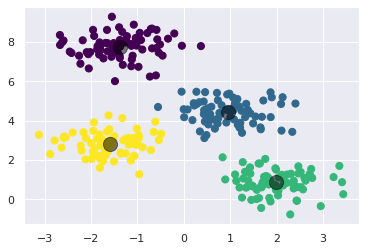

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

This notebook has been created with the help of https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html , it is also a good source if you want to now more about clustering. 

---
## Optional: Loading-Datasets
Scikit-learn comes with a bunch of small dataset. They were downloaded when you installed the library. Additionally sklearn offers a utility for directly downloading datasets from the OpenML database, in an sklearn-friendly format. In a future lecture, we will also see how to use tensorflow for loading data (which is probably more likely to be part of an actual future workflow of yours). Nevertheless, if you need data for an ML-task that is not neural network related, or just as a showcase, sklearn has some nice options: https://scikit-learn.org/stable/datasets.html

### Preinstalled Datasets
The digits dataset is a smaller (and easier) version of the famous MNIST handwrittten digits dataset. It contains digits written in human handwriting as data and the value of the respective digits as targets. Teaching an machine learning model to read human handwriting is a very typical task in the field of computer vision.

The data will be loaded as a sklearn ``Bunch`` object, which is more or less a fancy dictionary.

<class 'sklearn.utils.Bunch'> 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to 

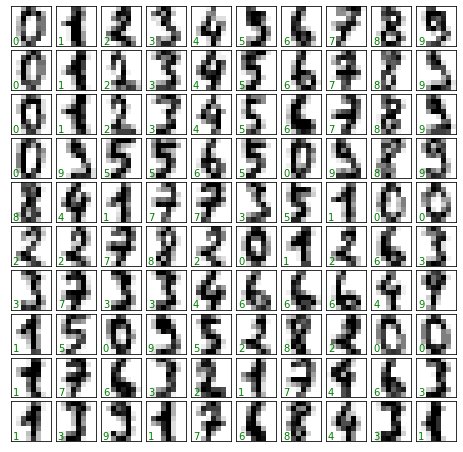

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()

print(type(digits),'\n')
print(digits.keys(),'\n')
print(digits.DESCR)

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Before the training of any machine learning model can start, usually some preprocessing is necessary. The datasets from sklearn are immediately ready to use inside of the library itself. But before we can use it to train something, we still have to split the data into (input-)data and target (also called label or ground-truth). We also want to further split the data in a training and a test set. The test set will then be used to evaluate the performance of our trained model.


Further reading: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

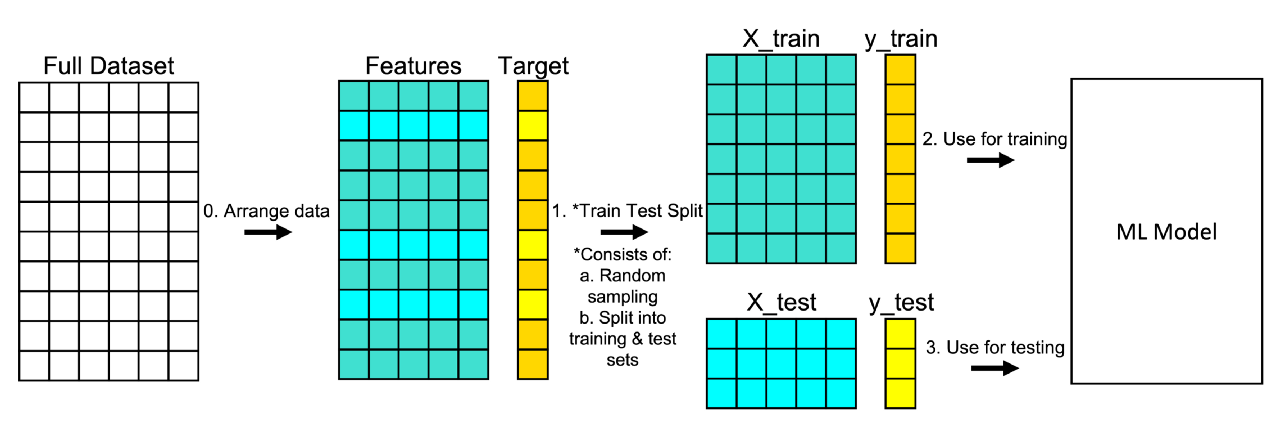
MIT License, Copyright (c) 2020 Michael Galarnyk, https://github.com/mGalarnyk

In [17]:
X = digits.data
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0);

The data is used to train a naive Bayes classifier. This classifier is just a (simple) example at this point, so you don't need to wrap your head around that.

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

model prediction: [2]


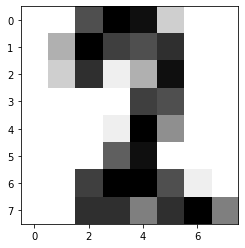

In [19]:
print("model prediction:", model.predict([Xtest[0]]))
plt.imshow(Xtest[0].reshape((8,8)), cmap='binary', interpolation='nearest')

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.5402857142857143

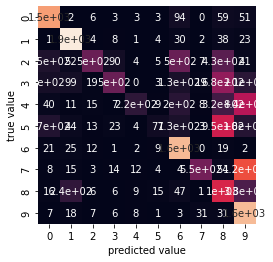

In [8]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Any classifier from scikit-learn can be trained with this data.

In [23]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
accuracy_score(ytest, y_model)

0.9916666666666667

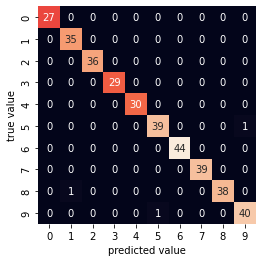

In [24]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### Downloading datasets
Most real datasets are too big to be part of the library itself. Sklearn offers a function for downloading any dataset from [openml.org](https://openml.org/) in a sklearn friendly format. Here we will download the actual MNIST dataset. It contains 70.000 examples, so downloading it might take a bit.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')

In [2]:
print(mnist.keys(), "\n")
print(mnist.DESCR)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']) 

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a res

In [10]:
from sklearn.naive_bayes import GaussianNB

X = mnist.data
y = mnist.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Accuracy: 0.5402857142857143


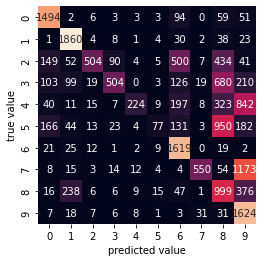

In [11]:
print("Accuracy:", accuracy_score(ytest, y_model))

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value');

---
## Dimensionality Reduction
While having as many features as possible usually helps when solving classification problems, the high dimensionalyty makes it hard to vizualize the data and can (depending on the model) drastically increase runtime. Sklearn offers several methos of reducing dimensionallity. You do not need to understand these methods for this course, but knowing them can help you in future machine learning or data analysis tasks.

### Optional: PCA
Principal Component analysis is a method for remapping data to a space with less dimensions, while still keeping as much variance of the data as possible. Consider the dataset below, that can be used to classify three different types of wine based on 13 features. A machine learning classifier does not care that one of these features is the alkohol content for instance. Remapping all these 13 dimensions (that are meaningful to humans) to two implicit dimensions (that are not meaningful to humans anymore) by PCA, can drastically decrease the size of the data.

Further reading: https://www.datacamp.com/tutorial/principal-component-analysis-in-python

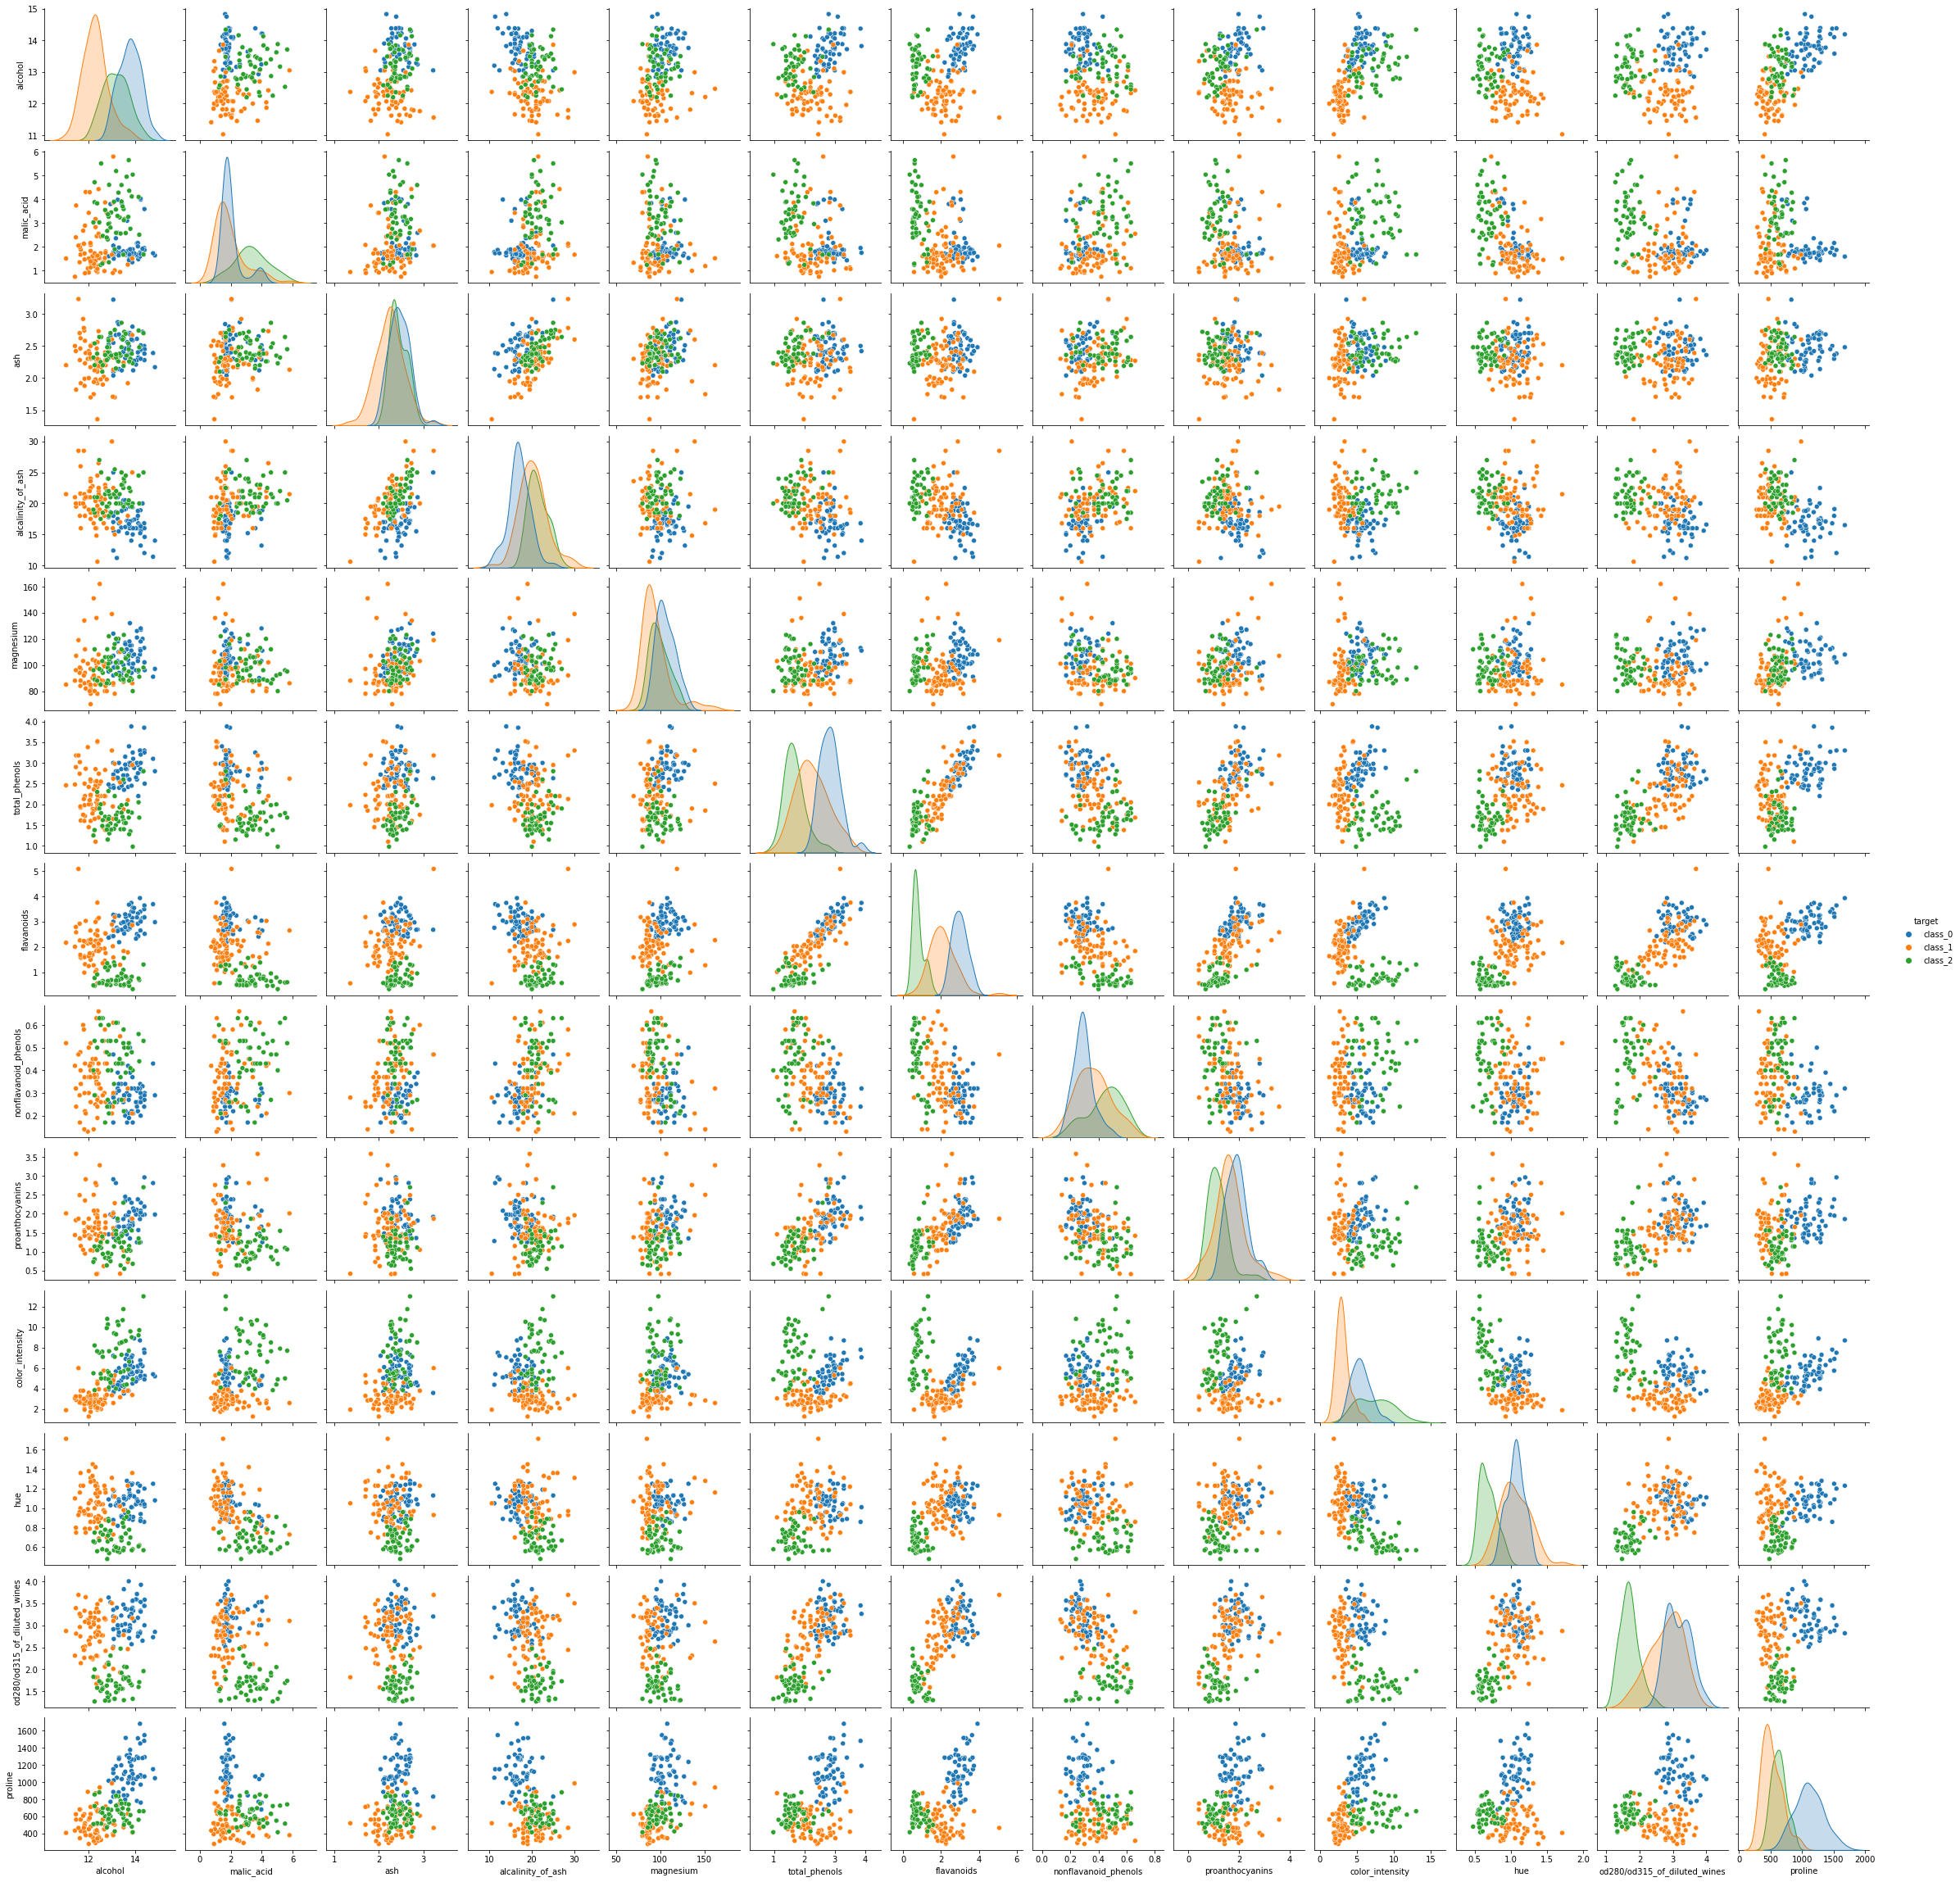

In [25]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

wine = load_wine(as_frame = True)
df = wine.data
df["target"] = wine.target.apply(lambda x: wine.target_names[x])
sns.pairplot(df, hue = "target")

We kept 99.98271461166031% of the variance of the original 13 dimensions


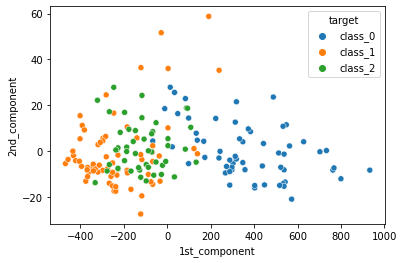

In [26]:
wine = load_wine()
pca = PCA(n_components=2)
pca.fit(wine.data)
df['1st_component'], df['2nd_component'] = pca.transform(wine.data).T
sns.scatterplot(x='1st_component', y='2nd_component', hue='target', data=df)
print("We kept {}% of the variance of the original 13 dimensions".format(sum(pca.explained_variance_ratio_)*100))

This cell checks the performance of an arbitrary classifier (in this case SVC), that was trained with a dataset, that uses all 13 features.

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

digits = load_wine()

X = digits.data
y = digits.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0);
clf = SVC()
print('"size" of data:', Xtrain.size)

clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("achieved accuracy:", accuracy_score(ytest, y_model))

"size" of data: 1729
achieved accuracy: 0.8222222222222222


This cell checks the performance of an arbitrary classifier, that was trained with a dataset, that uses the two first principal components (implicit dimensions) as features.

In [28]:
pca = PCA(n_components=2)
pca.fit(Xtrain)

Xtrain_transformed = pca.transform(Xtrain)
clf = SVC()

print('"size" of data:', Xtrain_transformed.size)

clf.fit(Xtrain_transformed, ytrain)
y_model = clf.predict(pca.transform(Xtest))

print("achieved accuracy:", accuracy_score(ytest, y_model))

"size" of data: 266
achieved accuracy: 0.7777777777777778


This cell checks the performance of an arbitrary classifier, that was trained with a dataset, that uses two subjectively "promising looking" dimensions (i.e. protein content and proline amino acid) as features.

In [29]:
digits = load_wine()

X_small = digits.data[:,-3:-1]
y = digits.target

Xtrain_small, Xtest_small, ytrain_b, ytest_b = train_test_split(X_small, y, random_state=0);
clf = SVC()

print('"size" of data:', Xtrain_small.size)

clf.fit(Xtrain_small, ytrain_b)
y_model = clf.predict(Xtest_small)

print("achieved accuracy:", accuracy_score(ytest_b, y_model))

"size" of data: 266
achieved accuracy: 0.6222222222222222


---
## Optional: Feature engineering
If you are interested in sklearn methods for tidying data, have a look at the linked tutorial. It also contains some of the content that we covered in the pandas lectures.

https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/05.04-Feature-Engineering.ipynb

---
# Evaluating Models
---
## Cross validation